<h1>Aside from skills and talents, 'Bot Laner' is the best role to rank up in League of Legends</h1>

<p style="float: center">Programming With Data</p>

<p style="font-size: 32px"> Sections</p>
<ol style="font-size: 16px;"><strong>
    <li>An introduction to the research space</li>
        <ol>
            <li>Objective of this project</li>
            <li>Datasets I'm working with</li>
            <li>Utilising the datasets</li>
            <li>Writing style to communicate ideas and concepts</li>
            <li>Summary of the Area of Research</li><br>
        </ol>
    <li>Project background</li>
        <ol>
            <li>Why the field is of interest?</li>
            <li>Has the topic not been previously explored?</li>
            <li>Scope of work</li>
            <li>Steps and stages in your analytical data processing pipeline</li>
            <li>A description of how you will evaluate your aims and objectives</li><br>
        </ol>
    <li>Retrieving necessary starting data</li>
        <ol>
            <li>Latest version of League of Legends</li>
            <li>List of playable champions from League of Legends</li>
            <li>Top 500 player in the Korea server</li><br>
        </ol>
    <li>How are the data relevant to project aims/objectives and the use of their sources are clearly justified</li>
        <ol>
            <li>Origin of data described clearly including data source and acquisition techniques used</li>
            <li>why this data source is appropriate for the research?</li>
            <li>A clearly identifiable case for working with this specific type of data </li>
            <li>Format of data is suitable for analysis</li>
            <li>A consideration of at least two other datasets and their potential strengths/weaknesses</li><br>
        </ol>
    <li>Ethics of use of data</li>
        <ol>
            <li>Description of where the data has come from</li>
            <li>Considerations about usage/reusage of data</li>
            <li>Consideration around implications of utilising data for purpose</li>
            <li>Considerations of the data processing pipeline</li>
            <li>Any potential biases of the dataset have been considered</li><br>
        </ol>
    <li>Is playing as "Bot Laner" really the best way to rank up?</li>
        <ol>
            <li>Examining the preferred roles of the top 500 Korean players</li>
            <li>League Points of the 500 players of the respective roles</li>
            <li>Win rate(%) in relation to League Points for the top 500 players</li>
            <li>Summary of this section</li><br>
        </ol>
    <li>Playstyle of Mid Laners</li>
        <ol>
            <li>Retrieving the profiles of Mid Laners among the top 500 players in the Korea server</li>
            <li>Processing the dataframe to see the player's performance</li>
            <li>Comparision of the Mid Laners' contributions to their games</li>
            <li>Should the Mid Laner play more passively?</li>
            <li>Summary of this section</li><br>
        </ol>
    <li>Champions and Items I should use</li>
        <ol>
            <li>The top 5 most played champions by Mid Laners in Korea</li>
            <li>The core items for each of the champions</li>
            <li>Combining the datasets of champions and items sets</li>
            <li>Summary of this section</li><br>
        </ol>
    <li>Conclusion</li>
</strong></ol>


In [2]:
!pip install seaborn

In [3]:
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from itertools import islice
import string
from IPython.display import Markdown
from IPython.display import display, HTML

import nltk
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from nltk import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
import time

<h1>1. An introduction to the research space</h1>

<img src="./assets/leagueOfLegends.png" width="750px" height=auto>
<p style="padding-left: 200px">Figure 1.1 : League of Legends</p>
<p style="padding-left: 200px">Source: https://www.washingtonpost.com/video-games/2019/10/27/league-legends-is-now-years-old-this-is-story-its-birth/</p>

<h3>A. Objective of this project</h3><br>
<p>My hypothesis for this project is <strong>"Aside from skills and talent, the playing as “Bot Laner” is the best way to rank up in League of Legends”</strong>.</p>
<p>That is so because my goal is to identify what are the factors, in-game decisions, and pre-game decisions a player should do to increase their probrability to reach higher ranks in League of Legends.</p>

<h3>B. Datasets I'm working with</h3><br>
<p>In order to reach my goal, I am going to use the following datasets:</p>
<h5>Poro.gg's database via their API : https://poro.gg</h5>
<ol>
    <li>https://lol.dakgg.io/api/v1/leaderboards/summoner-leagues/kr/RANKED_SOLO_5x5?page=(page number)</li>
    <li>https://lol.dakgg.io/api/v1/summoners/kr/(summoner ID)/matches?championId=&queueId=420</li>
    <li>https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/(champion name)?patch=( update )&tierId=1</li>
</ol>
<ol>
    <li>To shows the top players currently in Korea.</li>
    <li>To gain access to the data of the past 20 matches of mentioned players.</li>
    <li>To shows all of the details relating to the mentioned champion (eg build paths, win rate in percentage, bad match ups,...) from high ranking games.</li>
</ol>
<br>
<h5>RiotGame's Developer API (Data Dragon) : https://riot-api-libraries.readthedocs.io/en/latest/ddragon.html</h5>
<ol>
    <li>http://ddragon.leagueoflegends.com/cdn/( update )/data/en_US/champion.json</li>
    <li>https://ddragon.leagueoflegends.com/api/versions.json</li>
    <li>https://ddragon.leagueoflegends.com/cdn/( update )/img/(type)/(name).png</li>
</ol>
<ol>
    <li>To gain access to the list of playable champions of the update.</li>
    <li>To gain access to the numbering of League of Legends's lastest update.</li>
    <li>To gain access to images for this project.</li>
</ol>

<h3>C. Utilising the datasets</h3><br>
<p>By using Jupyter Notebook, I will use the API to form necessary dataframe for comparisions such as which type of players have more success in climbing the rank ladder. The analysis of the comparisions will be laid out in a comprehensible manner directly after the graphs' formation.</p>

<h3>D. Writing style to communicate ideas and concepts</h3><br>
<p>I write this project with the format of chapters so the readers are less likely to lose track of which section they are reading.</p> 
<p>Additionally, considering the topic of my project, I will explain all important keywords before going into the analysis. This will allows the reader to understand my point better.</p>

<h3>E. Summary of the Area of Research</h3><br>
<p>League of Legends is a 2009 multiplayer online battle arena video game developed and published by Riot Games</p>
<p>It is played in a game format of Multiplayer online battle arena (MOBA) , a subgenre of strategy video games in which two teams(Blue and Red) of players compete against each other on a predefined battlefield.</p>
<p>For this game, the predefined battlefield divided into 3 main areas :</p>
<ul>
    <li>Lane</li>
    <ul>
        <li>Can be seen with the three noticeable paths on the map.(upper , centre, lower)</li>
        <li>Where the AI-controlled units will spawn regularly for both teams in League of Legends. They play a crucial role in the game's dynamics, providing a source of gold and experience for players.</li>
    </ul>
    <li>Jungle</li>
    <ul>
        <li>The forest area filled with neutral monsters that the jungler defeats to gain experience and gold.</li>
        <li>The forest also contain objective monsters that can provide the whole team in-game advantages if killed</li>
        <li>Equally divided into four areas.</li>
    </ul>
    <li>Base</li>
    <ul>
        <li>The area where the players respawn and return to purchase upgrades.</li>
        <li>Once a team’s base is destroyed, the game will end with the sieging team returning as the victor.</li>
        <li>This is the goal of each match, is to destroy the opponents’ base.</li>
    </ul>
</ul>

<img src="./assets/Summoner_Rift_LoL.png" width="600" height="600">
<p style="padding-left: 200px">Figure 1.2 : The layout of the Summoner's Rift</p>
<p style="padding-left: 200px">Source: https://leagueoflegends.fandom.com/wiki/Map_(League_of_Legends)</p>

<p>Each team consist of 5 roles for each player (Top, Jungle, Mid, Bot,Support) :</p>
<ul>
    <li>Top Laner</li>
    <ul>
        <li>Takes the upper path.</li>
        <li>A 1 versus 1 lane.</li>
    </ul>
    <li>Mid laner</li>
    <ul>
        <li>Takes the centre path.</li>
        <li>A 1 versus 1 lane.</li>
    </ul>
    <li>Bot laner and support</li>
    <ul>
        <li>Takes the lower path.</li>
        <li>A 2 versus 2 lane.</li>
        <li>This is the goal of each match, is to destroy the opponents’ base.</li>
    </ul>
    <li>Jungler</li>
    <ul>
        <li>Traverse around the Jungle.</li>
        <li>To secure important objective monsters.</li>
        <li>Helps their team by “invading” one of the three lanes from time to time to increase the team's fighting power.</li>
    </ul>
</ul>

<h1>2. Project background</h1>

<h3>A. Why the field is of interest</h3><br>
<p>League of Legends has a ranked system structured into divisions and tiers with each tier representing a broad skill level range. It ranges from Iron, Bronze, Silver, Gold, Platinum, Emerald, Diamond, Master, Grandmaster, and Challenger.<br>Additionally, with the lowest being Iron and the highest pinnacle being Challenger, each tier is further divided into four subdivisions with IV being the lowest and I being the highest.</p>

<img src="./assets/Ranked Infographic.png" width="750px" height=auto>
<p style="padding-left: 150px">Figure 2.1 : a of League of Legends' rank titles</p>
<p style="padding-left: 150px">Source: https://support-leagueoflegends.riotgames.com/hc/en-us/articles/4406004330643-Ranked-Tiers-Divisions-and-Queues</p>

<p>I’ve started playing League of Legends since I was a primary school kid in 2012. For my entire time playing until 2023, I have never reached the division Gold IV in any ranked game. In the bigger picture, my statistics are pathetic. Without the capability to pay attention to every tiny detail or having an inhuman reaction time, I’ve decided that I should try to learn the train of thought from high-tier players instead, especially since I want to reach the tier Diamond (top 2.77% in Singapore) at least once.</p>

<h3>B. Has the topic not been previously explored?</h3><br>
<p>Naturally, when there is a video game with a competitive setting, there will always be guide videos or articles on the topic of how to get better at the game. However, most either don’t explain the full picture or give surface-level news to gate-keep the juicy bits behind a paywall. Since I don't find it worth to be spending my money on “coaching sessions” or “guides” on League of Legends, I feel that forming a code to analyse the top few players’ performance and playstyle will allow me to get a peek into their key decisions that lead to winning a game.</p>

<h3>C. Scope of work</h3><br>
<p>The original hypothesis, "Aside from skills and talent, the role “Bot Laner” the best way to rank up in League of Legends”, was raised from the idea that Bot Laner is often considered to be the cannon of the team. This is so because Champions for this role can output a lot of damage in exchange for lower survivability against other players. Therefore, as someone who is considered as a “Bot Main” nowadays, I firmly believe that I am already on the right path of ranking up.</p>

<p>Therefore, I will need to refer to the top players list to :</p>
<ul>
    <li>identify the role/lane with the most success,</li>
    <li>find the common playstyle among top players of that role,</li>
    <li>And find the top 5 most commonly played champions of that role, as well as which upgrade to unlock for them.</li>
</ul>

<h3>Steps and stages in my analytical data processing pipeline</h3><br>
<p>My general process consist of:</p>
<ol>
    <li>Retrieving necessary data from the needed API</li>
    <li>Process them to make them human readable in the format of pandas dataframe</li>
    <li>Remove any unecessary information that won't contribute to my project's goal</li>
    <li>Save the data as CSV so the graph can still load incase the API fails</li>
    <li>Generate graphs with said data accordingly</li>
    <li>Analyse the graphs to form conclusions</li>
</ol>

<h3>A description of how I will evaluate my aims and objectives</h3><br>
<p>I will explain my thought in close details, including my in-game knowledges, after every graph to aptly address on why the data look like so. Additionally, all of the graphs should be useful in answering my hypothesis and help the goal of this project</p>

<h1>3. Retrieving necessary starting data</h1>

<h3>A. Latest version of League of Legends</h3>

In [4]:
#retrieving the data from the api
res = requests.get(url='https://ddragon.leagueoflegends.com/api/versions.json', headers={'User-Agent': 'Mozilla/5.0'})
version = res.json()

#how this data is formatted is that the first element is the numbering of the latest update.
latestVersion = version[0]
latestVersion

'13.24.1'

In [5]:
#setting up a function for me to retrieve the list of playable champions as of the lastest update
def get_RiotGamesData(version,dataType):
        urlStart= 'http://ddragon.leagueoflegends.com/cdn/'
        urlMid = '/data/en_US/'
        urlEnd ='.json'
        res = requests.get(url=urlStart+version+urlMid+dataType+urlEnd, headers={'User-Agent': 'Mozilla/5.0'})
        return res.json()

<h3>B. List of playable champions from League of Legends</h3>

In [6]:
dataType = 'champion'
champions = get_RiotGamesData(str(latestVersion),dataType)

In [7]:
dfchampions = pd.DataFrame(champions['data'])
dfchampions

,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
version,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,...,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1,13.24.1
id,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
key,266,103,84,166,12,32,34,1,523,22,...,777,83,350,154,238,221,115,26,142,143
name,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
title,the Darkin Blade,the Nine-Tailed Fox,the Rogue Assassin,the Rogue Sentinel,the Minotaur,the Sad Mummy,the Cryophoenix,the Dark Child,the Weapon of the Faithful,the Frost Archer,...,the Unforgotten,Shepherd of Souls,the Magical Cat,the Secret Weapon,the Master of Shadows,The Spark of Zaun,the Hexplosives Expert,the Chronokeeper,the Aspect of Twilight,Rise of the Thorns
blurb,Once honored defenders of Shurima against the ...,Innately connected to the magic of the spirit ...,Abandoning the Kinkou Order and her title of t...,"Raising an eyebrow in the face of danger, Aksh...",Always a mighty warrior with a fearsome reputa...,Legend claims that Amumu is a lonely and melan...,Anivia is a benevolent winged spirit who endur...,"Dangerous, yet disarmingly precocious, Annie i...",Emerging from moonlight's shadow with weapons ...,"Iceborn warmother of the Avarosan tribe, Ashe ...",...,"In life, he was Yone—half-brother of Yasuo, an...",The last survivor of a long-forgotten religiou...,"A magical cat from Bandle City, Yuumi was once...",Zac is the product of a toxic spill that ran t...,"Utterly ruthless and without mercy, Zed is the...","A headstrong, spirited young woman from Zaun's...","With a love of big bombs and short fuses, the ...","Once a powerful Icathian mage, Zilean became o...","As the embodiment of mischief, imagination, an...","Born in an ancient, sorcerous catastrophe, Zyr..."
info,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'attack': 0, 'defense': 0, 'magic': 0, 'diffi...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 4, 'magic': 10, 'diff...","{'attack': 2, 'defense': 3, 'magic': 10, 'diff...","{'attack': 6, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 7, 'defense': 3, 'magic': 2, 'diffi...",...,"{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 6, 'defense': 6, 'magic': 4, 'diffi...","{'attack': 5, 'defense': 1, 'magic': 8, 'diffi...","{'attack': 3, 'defense': 7, 'magic': 7, 'diffi...","{'attack': 9, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 8, 'defense': 5, 'magic': 3, 'diffi...","{'attack': 2, 'defense': 4, 'magic': 9, 'diffi...","{'attack': 2, 'defense': 5, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 7, 'magic': 8, 'diffi...","{'attack': 4, 'defense': 3, 'magic': 8, 'diffi..."
image,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'full': 'Akali.png', 'sprite': 'champion0.png...","{'full': 'Akshan.png', 'sprite': 'champion0.pn...","{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'full': 'Anivia.png', 'sprite': 'champion0.pn...","{'full': 'Annie.png', 'sprite': 'champion0.png...","{'full': 'Aphelios.png', 'sprite': 'champion0....","{'full': 'Ashe.png', 'sprite': 'champion0.png'...",...,"{'full': 'Yone.png', 'sprite': 'champion5.png'...","{'full': 'Yorick.png', 'sprite': 'champion5.pn...","{'full': 'Yuumi.png', 'sprite': 'champion5.png...","{'full': 'Zac.png', 'sprite': 'champion5.png',...","{'full': 'Zed.png', 'sprite': 'champion5.png',...","{'full': 'Zeri.png', 'sprite': 'champion5.png'...","{'full': 'Ziggs.png', 'sprite': 'champion5.png...","{'full': 'Zilean.p

<p>Rows clarification</p>
<ul>
    <li>version : the update of this dataset</li>
    <li>id : ID name of the champion</li>
    <li>key : the champion's ID</li>
    <li>name : name of the champion</li>
    <li>title : the champion's title in the game's lore</li>
    <li>blurb : the champion's description</li>
    <li>info : the champion's simplified and difficulty rating</li>
    <li>image : the name of the images related to the champion</li>
    <li>tags : the general category of the champion</li>
    <li>partype : resources the champion uses to perform their abilities in game</li>
    <li>stats : every single information regarding the champion's performance in game</li>
</ul>

In [8]:
#I remove unecessary rows consist of data that not required for this projects
df_processedChampions = dfchampions.drop(labels=["id","blurb","stats","title","version","info","image"])
df_processedChampions.Ahri

key                     103
name                   Ahri
tags       [Mage, Assassin]
partype                Mana
Name: Ahri, dtype: object

In [9]:
#save the list of playable champions as CSV
cwd = os.getcwd()
filename = "ChampionsLoL.csv"
pathChamp = os.path.join(cwd,filename)
df_processedChampions.to_csv(pathChamp,index = False)

In [10]:
df_championsLoL = pd.read_csv(pathChamp)
df_championsLoL

,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
0,266,103,84,166,12,32,34,1,523,22,...,777,83,350,154,238,221,115,26,142,143
1,Aatrox,Ahri,Akali,Akshan,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,...,Yone,Yorick,Yuumi,Zac,Zed,Zeri,Ziggs,Zilean,Zoe,Zyra
2,"['Fighter', 'Tank']","['Mage', 'Assassin']",['Assassin'],"['Marksman', 'Assassin']","['Tank', 'Support']","['Tank', 'Mage']","['Mage', 'Support']",['Mage'],['Marksman'],"['Marksman', 'Support']",...,"['Assassin', 'Fighter']","['Fighter', 'Tank']","['Support', 'Mage']","['Tank', 'Fighter']",['Assassin'],['Marksman'],['Mage'],"['Support', 'Mage']","['Mage', 'Support']","['Mage', 'Support']"
3,Blood Well,Mana,Energy,Mana,Mana,Mana,Mana,Mana,Mana,Mana,...,Flow,Mana,Mana,NaN,Energy,Mana,Mana,Mana,Mana,Mana


<h3>C. Top 500 player in the Korea server</h3>

In [11]:
#each page of the leaderboard only shows 100 players.
#therefore, I made these functions in order to retrieve 500 players more easily.
def get_topplayer(page):
        url = 'https://lol.dakgg.io/api/v1/leaderboards/summoner-leagues/kr/RANKED_SOLO_5x5?page='
        res = requests.get(url=url+page, headers={'User-Agent': 'Mozilla/5.0'})
        return res.json()

def get_n_topplayer(page):
    reviews = []

    while page > 0:
        response = get_topplayer(str(page))
        cutoffP = response['summonerTierCutoffs']
        reviews += response['summonerLeagueRankings']
        page = page -1
    
    print(cutoffP)
    return reviews

In [12]:
top500Players = get_n_topplayer(5)
#cut off points represent the bare minimum points needed to reach this rank.

{'CHALLENGER': 925, 'GRANDMASTER': 615}


In [13]:
dftopPlayers = pd.DataFrame(top500Players)
dftopPlayers = dftopPlayers.sort_values(['leaguePoints'], ascending=[0])
dftopPlayers = dftopPlayers.reset_index(drop=True)
dftopPlayers = dftopPlayers.drop(labels=["shard","name","gameName","tagLine","profileIconId"],axis =1)
dftopPlayers.head(2)


,summonerId,summonerLevel,tier,rank,leaguePoints,plays,wins,mostPositionId,mostPosition,mostChampionIds
0,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,484,CHALLENGER,I,1955,497,292,3,MIDDLE,"[84, 777, 126, 268, 517]"
1,D7ro7TcLhbnTRLUeHHb41blBHfTNt3x8YgIHLNmVDfYguBI,575,CHALLENGER,I,1916,392,235,3,MIDDLE,"[777, 126, 897, 517, 268]"


<p>Columns clarification</p>
<ul>
    <li>summonerId : the player's Id</li>
    <li>summonerLevel : the level of the player's account</li>
    <li>tier : the current rank of the player's account</li>
    <li>leaguePoints : the point system to indicate how skilled is the player. For the purpose of matching the player with other players at similar skill level</li>
    <li>plays : the total number of games played on this account</li>
    <li>wins : the total number of games won by this account for this competitive gamemode</li>
    <li>mostPositionId : the ID of the role most played on this account</li>
    <li>mostPosition : the role most played on this account</li>
    <li>mostChampionIds : the top 5 most played champions on this account</li>
</ul>

<p>Those removed :</p>
<ul>
    <li>shard : to indicate the region where this dataset comes from</li>
    <li>name : the original name of the account</li>
    <li>gameName : the current in-game name of this account</li>
    <li>tagLine : the identifier code of this account</li>
    <li>profileIconId : the Id of the account's current in-game profile picture</li>
</ul>

In [15]:
#save the list of top 500 KR players as CSV
cwd = os.getcwd()
filename = "top500playerKRLoL.csv"
pathPlayer = os.path.join(cwd,filename)
dftopPlayers.to_csv(pathPlayer,index = False)

In [55]:
df_top500KRLoL = pd.read_csv(pathPlayer)
df_top500KRLoL.head(5)

,summonerId,summonerLevel,tier,rank,leaguePoints,plays,wins,mostPositionId,mostPosition,mostChampionIds
0,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,484,CHALLENGER,I,1955,497,292,3,MIDDLE,"[84, 777, 126, 268, 517]"
1,D7ro7TcLhbnTRLUeHHb41blBHfTNt3x8YgIHLNmVDfYguBI,575,CHALLENGER,I,1916,392,235,3,MIDDLE,"[777, 126, 897, 517, 268]"
2,Z1GOBrAWpxjsWHL6bwPtMCEnGuf8a78qUMOiBe5QQNG65Vw,947,CHALLENGER,I,1872,770,421,2,JUNGLE,"[59, 64, 121, 111, 234]"
3,kzGwsF-itPa18MXfCjyfnZ3EnHt6wSsI1s78mqJoh846OCEI,500,CHALLENGER,I,1639,995,537,5,UTILITY,"[497, 526, 12, 111, 888]"
4,QiAwUQ8L4_vJsYBSChUlf7--tKcSHIS6ikKzqTqwG19LX8k,346,CHALLENGER,I,1619,582,333,2,JUNGLE,"[64, 76, 234, 78, 59]"


<h1>4. How are the data relevant to project aims/objectives and the use of their sources are clearly justified</h1>

<h3>A. Origin of data described clearly including data source and acquisition techniques used</h3><br>
<p>Poro.gg is a website that provides the service of tracking all statistics related to all games played in League of Legends.</p>
<ul>
    <li>Track individual player's performances.</li>
    <li>Helps to find trends relating most played characters or top players in respective servers and skill groups.</li>
    <li>APIs are obtained by inspecting the website and tracking important XHR files that are retrieved via GET from the website’s database whenever the page is loaded.</li>
</ul>
<br>
<p>Data Dragon (ddragon).</p>
<ul>
    <li>Riot Games' way of centralizing League of Legends game data and assets, including champions, items, runes, summoner spells, and profile icons via API. Allowing third-party developers to use them for any personal projects.</li>
    <li>Data is accessed by API links provided by RiotGames.</li>
</ul>


<h3>B. why this data source is appropriate for the research?</h3><br>
<p>Poro.gg</p>
<ul>
    <li>Allows me to track the top players of each server and provides me detailed pieces of information regarding the said player’s most played role, champions, upgrades, and in-game performances.</li>
</ul>
<br>
<p>Data Dragon (ddragon)</p>
<ul>
    <li>Even Poro.gg refers to this API to retrieve necessary details regarding the player's in-game upgrades, abilities, and champions. Thus, to make sense of some data, it is required for me to use them as well.</li>
</ul>
<br>
<p>The Korean Leaderboard</p>
<ul>
    <li>Korea is commonly regarded as the peak server of League of Legends due to the large number of players dedicated to reaching the top of the leaderboard. This eventually led to the idea of players all around the world, who wanted to test themselves, moving to Korea for some time to climb this ladder. Hence, The Korea server is a pool mixed and matched with varied strategies and playstyles. Ranging from people who mastered playing a single champion to those who utilise all of the game knowledge(down to the tiniest detail such as lane minions' health values) to win. Therefore, I should use data from Korea for this project</li>
</ul>




<h3>C. A clearly identifiable case for working with this specific type of data</h3><br>
<p>One of the best ways to find any new playstyles or sets of upgrades is to experiment or refers to the top players. Therefore, with the information that I am a player who is not willing to “dig” too deep into the game mechanic, It is essential for me to use Poro.gg due to their large and rich database of the game and every games played.</p>

<img src="./assets/snippetOfChampionStatistic.png" width="500px" height=auto>
<p style="padding-left: 250px">Figure 4.1 : a section of Poro.gg's data on the champion Kaisa</p>
<p style="padding-left: 250px">Source: https://poro.gg/champions/kaisa/sr/adc</p>


<h3>D. Format of data is suitable for analysis</h3><br>
<p>I will Convert JSON from the API into pandas dataframes and then save them as CSV so data can still be accessed when the online database is in maintenance or down. Afterward, the dataframes will be used with either matplotlib or seaborns to generate graphs for analysis</p>

<h3>E. A consideration of at least two other datasets and their potential strengths/weaknesses</h3><br>
<p>"League of Legends 2023 Professional Matches"</p>
<ul>
    <li>Recorded and uploaded by Lincoln Costa onto Kaggle.</li>
    <li>This contains every major details occurred during League of Legends World Championship 2023.</li>
    <li>At surface level, I should be looking into games performed by professional instead. However, looking at games performed by professionals will not be useful for my objectives. In League of Legends’ main rank game mode, you can at most bring one friends to play with you. Therefore, in professional level games, there are alot of teamworks, strategies, and gameplay executions that impossible to achieve in normal games or specifically performed to disrupt a specific team's playstyle. Therefore, it is a common knowledge in the community is that many playstyles or strategies in professional scenes can't be adapted into a normal game.</li>
</ul>

<p>OP.gg</p>
<ul>
    <li>Another League of Legends statistic tracking service.</li>
    <li>They show more functionalities.</li>
    <ul>
        <li>Such as generating a map that shows the position of all recorded champion’s death in a game
And timing of all vision wards placed (vision wards are items that light an area on the map for the whole team to see)</li>
        <li>These informations will provide more in-depth play style details compared to what Poro.gg provides.</li>
    </ul>
    <li>I am unable to retrieve the XHR file file the APIs to show the data mentioned above.</li>
    <li>Additionally, these sort of data require a SHP file of the Summoner's Rift for me to visualise them, which are not (as far to my knowledge) not availble to the public at the moment</li>
</ul>


<h1>5. Ethics of use of data</h1>

<h3>A. Description of where the data has come</h3><br>
<p>All APIs used in this project are from sources that are open to the public.</p>
<ul>
    <li>https://riot-api-libraries.readthedocs.io/en/latest/ddragon.html</li>
    <li>https://poro.gg/</li>
</ul>
<p>The difference is that instead of going onto the website itself, I retrieve the datasets and view the information via text here.</p>


<h3>B. Considerations about usage/reusage of data</h3><br>
<p>The General and Game Policies, Terms of Use and Legal Notices of using RiotGames' developer API can be read on :<br> https://developer.riotgames.com/docs/lol</p>
<p> Regardless, based on RiotGames’s Developer APi Policy, by using their API means that this project must:</p>
<ul>
    <li>Products cannot violate any laws.</li>
    <li>Do not create or develop games utilizing Riot’s Intellectual Property (IP).</li>
    <li>Products cannot alter the goal of the game (i.e. Destroy the Nexus).</li>
    <li>Products cannot create an unfair advantage for players, like a cheating program or giving some players an advantage that others would not otherwise have.</li>
    <li>If your product serves players, you must register it with us regardless of whether or not your product uses officially documented APIs.</li>
    <li>Products should not remove game decisions but may highlight important decisions and give multiple choices to help players make good decisions.</li>
</ul>
<p>Given this project is personal and serves as an opportunity to analyse top player’s game, there is no tampering with the source data or making of transformative content. Thus, this project does not break any policy and is safe to use.</p>


<h3>C. Consideration around implications of utilising data for purpose</h3><br>
<p>Considering that the goal of this project is to attempt to find a hidden pattern among top players, there is no form of personal judgement from others that can affect the outcome or any possibly harmful details to come out of this project. In fact, at most, it will be my train of thought as a low-tier player that might limit me from understanding the top players' decisions.</p>

<h3>D. Considerations of the data processing pipeline</h3><br>
<p>All data forming and analysis performed will be clearly laid out in this notebook for the readers.</p>

<h3>E. Any potential biases of the dataset have been considered</h3><br>
<p>The dataset can't be biased as it only records what the top players did in their games. If there was any bias existed, it would affect the integrity of databases, and the reputations of both Poro.gg and RiotGames</p>


<h1>6. Is playing as "Bot Laner" really the best way to rank up?</h1>

<img src="./assets/Different-Lanes-LoL.png" width="600px" height=auto>
<p style="padding-left: 200px">Figure 6.1 : Icons of the 5 roles in League of Legends</p>
<p style="padding-left: 200px">Source: https://earlygame.com/lol/what-roles-exist</p>

<h3>A. Examining the preferred roles of the top 500 Korean players</h3>

Among the top 500 players,
96 preferred role is Bot Laner
116 preferred role is Jungler
109 preferred role is Mid Laner
91 preferred role is Top Laner
88 preferred role is Support


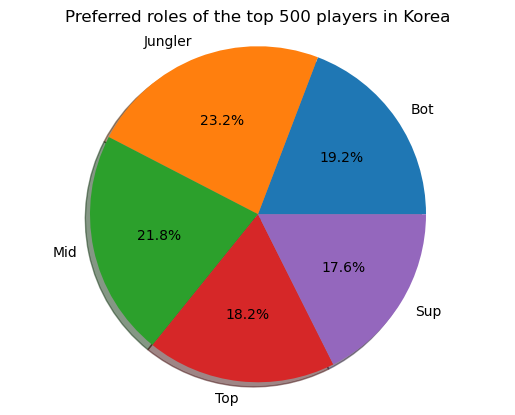

In [17]:
df_top500Players = df_top500KRLoL
bot = 0
jungle = 0
mid = 0
top = 0
support = 0

for key,value in df_top500Players.iterrows():
    x = value['mostPosition']
    if x == "BOTTOM":
        bot+=1
    elif x == "JUNGLE":
        jungle+=1
    elif x == "MIDDLE":
        mid+=1
    elif x == "TOP":
        top+=1
    elif x == "UTILITY":
        support+=1
        
print("Among the top 500 players,")
print(str(bot)+" preferred role is Bot Laner")
print(str(jungle)+" preferred role is Jungler")
print(str(mid)+" preferred role is Mid Laner")
print(str(top)+" preferred role is Top Laner")
print(str(support)+" preferred role is Support")


sizes = [bot,jungle,mid,top,support]
labels = 'Bot', 'Jungler', 'Mid', 'Top', 'Sup'


plt.pie(sizes, autopct='%1.1f%%', shadow = True, labels = labels)

plt.title('Preferred roles of the top 500 players in Korea')
plt.axis('equal')


plt.show()

<ul>
    <li>Among the top 500 players in Korea, though all roles are preferred relatively the same, Jungler and Mid Laner are the more preferred roles to play. This goes against my hypothesis. I initially thought that the most preferred role to play would be Bot Laner due to their larger pool of characters that can output lots of damage since you can't lose the game if all of your opponents are dead.</li>
    <li>Additionally, in the League of Legends community, there have been complaints from players who preferred other roles that Bot Laner's champions are too strong.</li><br>
    <li>However, it is still not that surprising to see that Mid Laner and Jungle would be preferred more than Bot Laner. This could be due to their roles and positions giving them opportunity to invades other lanes, and they alone are in control of their situation. While for Bot Laner, you'll have to play with another person (Support) which may hinder you.</li>
</ul>

<h3>B. League Points of the 500 players of the respective roles</h3>

Upper Bound for Jungler: 1424.375
Lower Bound for Jungler: 539.375
 
Upper Bound for Jungler: 1424.375
Lower Bound for Jungler: 539.375


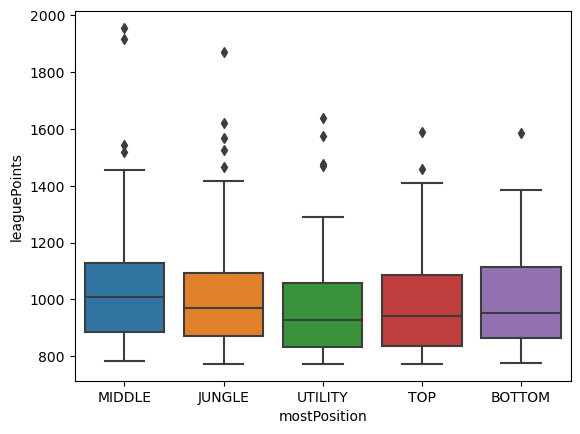

In [18]:
df_top500Players = df_top500KRLoL

sns.boxplot(x='mostPosition', y='leaguePoints', data= df_top500Players)

#to find the upper and lower values of Mid Laners and Junglers
jungler_data = df_top500Players[df_top500Players['mostPosition'] == 'JUNGLE']
q1J = jungler_data['leaguePoints'].quantile(0.25)
q3J = jungler_data['leaguePoints'].quantile(0.75)
iqrJ = q3J - q1J
Mid_data = df_top500Players[df_top500Players['mostPosition'] == 'MID']
q1M = jungler_data['leaguePoints'].quantile(0.25)
q3M = jungler_data['leaguePoints'].quantile(0.75)
iqrM = q3M - q1M

# Calculate upper and lower bounds for the whiskers
upper_boundJ = q3J + 1.5 * iqrJ
lower_boundJ = q1J - 1.5 * iqrJ
upper_boundM = q3M + 1.5 * iqrM
lower_boundM = q1M - 1.5 * iqrM

# Print the upper and lower bounds
print("Upper Bound for Jungler:", upper_boundJ)
print("Lower Bound for Jungler:", lower_boundJ)
print(" ")
print("Upper Bound for Jungler:", upper_boundM)
print("Lower Bound for Jungler:", lower_boundM)

# Show the plot
plt.show()

<p>League Points (LP for short) are values that indicate how skilled you are as a player. It main purpose is to help the game in matching the players with similar skill level together. Ensuring a fair game.</p>
<ul>
    <li>This graph shows that the average Mid Laners and Junglers seem to have higher League Points when compared to Bot Laner.</li>
    <li>This can be seen with Mid Laners and Junglers having higher average values and more players with higher League Points values who are outside of the normal bound.</li>
    <li>What is surprising to me is that Top Laner and Support (which is called Utility in this graph) have relatively similar average values for League Points. Top Laners are similar to Mid Laners in the sense that they are in control of their own gameplay decisions, except that their lane/positioning is more isolated compared to the rest fo the team. Knowing this, I thought that Top Laner would have more influence over the game than Support.</li>
    <li>Infact, Support, Top, and Bot have similar average for League Points.</li>
    <li>This graph really shoes that Mid Laners and Junglers might be the better role to play in order ot rank up, when compared to my initial hypothesis.</li>
</ul>

<h3>C. Win rate(%) in relation to League Points for the top 500 players</h3>

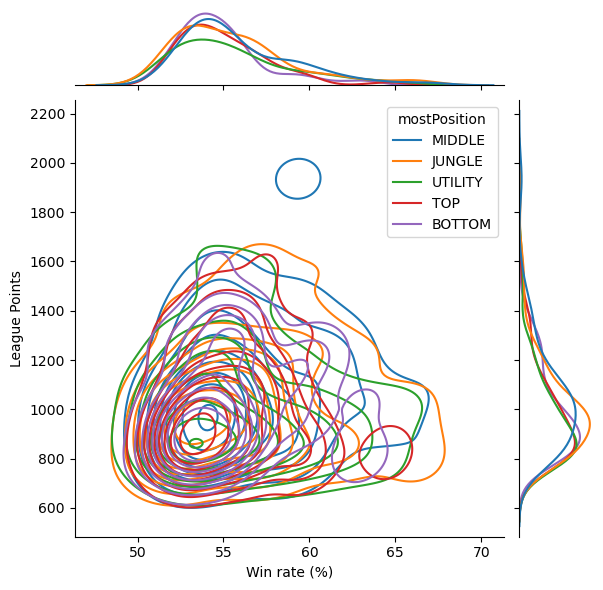

In [19]:
df_top500Players = df_top500KRLoL
#check if the columns already exist.
#if not, then create the column "winRate%".
if 'winRate%' in df_top500Players:
    df_top500Players['winRate%'] = 0
else:
    df_top500Players.insert(5,'winRate%',0)

winRate = []
for key,value in df_top500Players.iterrows():
    x = value['wins']
    y = value['plays']
    winPercen = (x/y)*100
    winRate.append(winPercen)

df_top500Players['winRate%'] = winRate
df_top500Players = df_top500Players.drop(labels=["wins","plays"],axis =1)

    
sns.jointplot(x='winRate%', y='leaguePoints', data=df_top500Players, hue='mostPosition', kind='kde')

# Set the label for the x-axis
plt.xlabel('Win rate (%)')

# Set the label for the y-axis
plt.ylabel('League Points')

# Display the plot
plt.show()

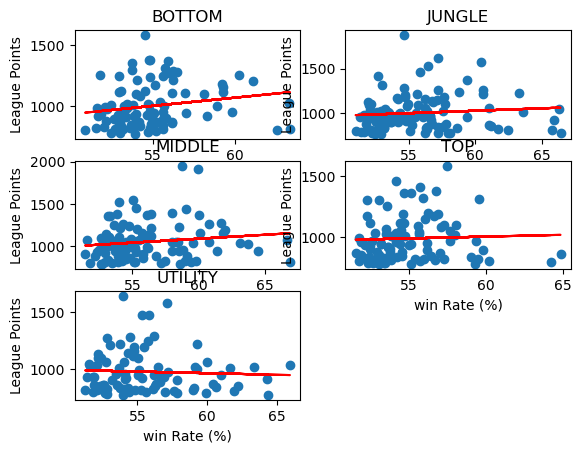

In [20]:
fig = plt.figure()

#format the positioning of the graph.
#they will be positioned in the format of 3x2.
axbot = fig.add_subplot(321)
axjug = fig.add_subplot(322)
axmid = fig.add_subplot(323)
axtop = fig.add_subplot(324)
axsup = fig.add_subplot(325)

role = ["BOTTOM","JUNGLE","MIDDLE","TOP","UTILITY"]
roleVar = [axbot,axjug,axmid,axtop,axsup]
for i in range(len(role)):
    rslt = df_top500Players.loc[df_top500Players["mostPosition"] == role[i]]
    a,b = np.polyfit(rslt['winRate%'],rslt['leaguePoints'],1)
    roleVar[i].scatter(rslt['winRate%'],rslt['leaguePoints'])
    roleVar[i].plot(rslt['winRate%'], a*rslt['winRate%']+b,color='red')
    
for i in range(len(role)):
    roleVar[i].set_title(role[i])
    roleVar[i].set_xlabel('win Rate (%)')
    roleVar[i].set_ylabel('League Points')
    
plt.show()

<p>Win rate percentage value is a result of comparing the total number of games won compared to the total number of games played.</p>
<ul>
    <li>The set of graph shows that both Junglers and Mid Laners seem to be the role that have highest average win rate compare to the rest. This can be seen from their maximum winrate of 66% compared to Bot Laner's maximum 64%. </li>
    <li>However, first graph shows that there seem to be a higher concentration of Mid Laners with high win rate and LP cmopared to Junglers'.</li>
    <li>Therefore, the role Mid Laner seem to be the best role to play to rank up (ignoring skills and talents).</li>
</ul>


<h3>D. Summary of this section</h3>

<ul>
    <li>Mid Laners and Junglers are the more preferred roles compared to others.</li>
    <li>Mid Laners Junglers have the higher average LP comapred to others, with Mid Laners having the highest average.</li>
    <li>Though Mid Laners and Junglers have the same value for maximum win rate, Mid Laners have a higher density of players who have higher LP and Win rate compared to Junglers'.</li>
</ul>

<p><strong>After deeper consideration, the role of mid laner is the best role to play</strong></p>
<ol>
    <li>To play as a jungler, you will require learn more game knowledges  such as knowing when neutral forest monsters respawn, how to clear the jungle optimally, when and how to invade other lanes. These things are hard to remember learn unless they are drilled in via practising specifically those game mechanic, which I find not worth of my time learning at the moment.</li>
    <li>A jungler's responsibilities revolve around ensuring game-pivoting objectives monsters are killed, and helping other lanes properly. Failing to do either will result in stronger opponents since they are the one who got the objective monsters instead or the opponent's laner will be stronger from you dying to them.</li>
</ol>
<ol>
    <li>Early game is a term to describe the first 10 minutes of the game.</li>
    <li>And for Bot Laner, you're weak in the early game. Your main responsibility is to kill lane minions and maybe even kill the opponents to gain as much gold as possible in order to buy upgrades that significantly increase your damage output. Falling behind in early game will greatly affectyour performance in the late game. Eventually leading to you to be underwhelming in your role to perform your task of destroying the opponents' base and weaking the opponent's Top Laner. This is so because of you geting your upgrades later.</li>
    <li>Furthermore, since youre weak early game, you will have to rely on your support. Therefore, if your support is incompetent, your capability to peform in the early game will be heavily compromised. Its hard to make decision on your own.</li>
    <li>Lastly, Bot Laner will only be a "Damage-per-Second" powerhouse when the game reach its 20-25 minutes mark. If the game were to ends early, then your slow scaling of damage output does not matter.</li>
</ol>
<p>compared to Mid Laner :</p>
<ol>
    <li>At bare minimum, ensure that you do not lose your lane's turret since mid lane is the fastest path to the team's base.</li>
    <li>Since mid laners are in a 1v1 lane, you are not required to play around another player.</li>
</ol>

<h1>7. Playstyle of Mid Laners</h1>

<h3>A. Retrieving the profiles of Mid Laners among the top 500 players in the Korea server</h3>

In [21]:
def get_Laner(summoner):
        urlStart = 'https://lol.dakgg.io/api/v1/summoners/kr/'
        urlEnd = '/matches?championId=&queueId=420'
        res = requests.get(url=urlStart+summoner+urlEnd, headers={'User-Agent': 'Mozilla/5.0'})
        return res.json()

def get_n_Laner(df,role):
    count = 1;
    for key,value in df.iterrows():
        x = value['mostPosition']
        
        #only start retrieving the player's previous 20 matches if and only if their preferred role is Mid Laners in this case.
        if x == role:    
            y = value['summonerId']
            res = get_Laner(y)
            
            #to retrieve only the matches data.
            df_playerMatches = pd.DataFrame(res['matches'])
            df_playerMatches.insert(0,'summonerId',y)
                
            #to retrieve only the player performance data.
            df_matchesDetails = pd.json_normalize(df_playerMatches['participants'])
            
            #to filter out all others players performance data, but the focused player.
            columns = list(df_matchesDetails)
            df_matchesDetails.insert(10,'performance',0)
            
            newColval = []
            for Mkey,Mvalue in df_matchesDetails.iterrows():
                for col in columns:
                    
                    z = df_matchesDetails[col][Mkey]["summonerId"]
                    if z == y:
                        newColval.append(df_matchesDetails[col][Mkey])
                        break
    
            df_matchesDetails['performance'] = newColval
        
            #to add the column "performance" to the main dataframe.
            df_playerMatchesProcessed = pd.concat([df_playerMatches,df_matchesDetails['performance']],axis=1)
                
            #to repeat and add other matches to the main dataframe.
            if count == 1:
                masterDF = df_playerMatchesProcessed
                count = 0
            else:
                masterDF = pd.concat([masterDF,df_playerMatchesProcessed])
    
    return masterDF

In [22]:
df_midlanersAmongTop500  = get_n_Laner(df_top500KRLoL,"MIDDLE")

In [54]:
df_midlanersAmongTop500KR = df_midlanersAmongTop500.drop(labels=["participants","teams","patch","gameType","gameMode",
                                                               "mapId","queueId","matchId","shard"],axis =1)
df_midlanersAmongTop500KR.head(2)

,summonerId,gameCreatedAt,gameDuration,performance
0,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,2023-12-21T13:36:31.000Z,2132,"{'assists': 9, 'baronKills': 0, 'basicPings': ..."
1,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,2023-12-21T13:00:14.000Z,1330,"{'assists': 5, 'baronKills': 0, 'basicPings': ..."


<p>Columns Clarification :</p>
<ul>
    <li>gameCreated : the time in which the game starts</li>
    <li>gameDuration : the duration of the game in seconds</li>
    <li>performance : records of the player's statistic</li>
</ul>

<p>Those that got removed: </p>
<ul>
    <li>participants : records of all of the players in this game</li>
    <li>teams : to show how many teams are there and what are the team Id of this game</li>
    <li>patch : the update in which the game is played</li>
    <li>gameType : to indicate the gamemode of this game</li>
    <li>gameMode : the official title of said gamemode</li>
    <li> mapId : to indicate which map is played for this game</li>
    <li>queueId : to identify the queue used to bring all of the players together</li>
    <li>matchId : to identify which match is this</li>
    <li>shard : the server this game is played in</li>
</ul>

<h3>B. Processing the dataframe to see the player's performance</h3>

In [51]:
df_playerPerformance = pd.json_normalize(df_midlanersAmongTop500KR['performance'])
df_playerPerformance.head(2)


,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,playerAugment1,playerAugment2,playerAugment3,playerAugment4,playerSubteamId,subteamPlacement,perks.statPerks.defense,perks.statPerks.flex,perks.statPerks.offense,perks.styles
0,9,0,0,1,21308,18,61,orianna,0,8,...,0,0,0,0,0,0,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
1,5,0,0,0,10121,13,23,tryndamere,0,3,...,0,0,0,0,0,0,5002,5003,5005,"[{'description': 'primaryStyle', 'selections':..."


In [58]:
df_playerPerformanceProcessed = df_playerPerformance.drop(labels=["largestCriticalStrike","largestKillingSpree","largestMultiKill","longestTimeSpentLiving","magicDamageDealt","magicDamageDealtToChampions",
                                                         "magicDamageTaken","physicalDamageDealt","physicalDamageDealtToChampions","physicalDamageTaken","profileIcon","riotIdGameName","riotIdTagline",
                                                         "killingSprees","summonerLevel","summonerName","timeCCingOthers","totalDamageDealt","totalDamageDealtToChampions","totalDamageShieldedOnTeammates",
                                                         "totalDamageTaken","totalHeal","totalHealsOnTeammates","totalTimeCCDealt","totalUnitsHealed","tripleKills","trueDamageDealt","trueDamageDealtToChampions",
                                                         "trueDamageTaken","playerAugment1","playerAugment2","playerAugment3","playerAugment4","playerSubteamId","subteamPlacement","perks.statPerks.defense","perks.statPerks.flex",
                                                         "perks.statPerks.offense","perks.styles","doubleKills","quadraKills","pentaKills","teamPosition","teamId","puuid","gameEndedInEarlySurrender","gameEndedInSurrender","teamEarlySurrendered",
                                                         "damageSelfMitigated","consumablesPurchased","participantId","basicPings","championTransform","itemsPurchased"],axis =1)

df_toAdd = df_midlanersAmongTop500KR.copy()
columnsToAdd = list(df_playerPerformanceProcessed)

for i in columnsToAdd:
    df_toAdd[i] = df_playerPerformanceProcessed[i]
    
df_midlanerTotal = df_toAdd.drop(labels=["performance"],axis =1)
df_midlanerTotal = df_midlanerTotal.reset_index(drop=True)
df_midlanerTotal.head(2)


,summonerId,gameCreatedAt,gameDuration,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,...,totalTimeSpentDead,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,2023-12-21T13:36:31.000Z,2132,9,0,1,21308,18,61,orianna,...,247,1,1,10,0,32,6,9,17,True
1,mlxn5B82fbdtrgO2E1wOCG3T6peSNgYATJdhF9R3R974TKg,2023-12-21T13:00:14.000Z,1330,5,0,0,10121,13,23,tryndamere,...,237,0,0,7,0,16,2,4,4,False


In [59]:
columns = list(df_midlanerTotal)
print(columns)


['summonerId', 'gameCreatedAt', 'gameDuration', 'assists', 'baronKills', 'bountyLevel', 'champExperience', 'champLevel', 'championId', 'championName', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'deaths', 'detectorWardsPlaced', 'dragonKills', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'lane', 'neutralMinionsKilled', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'role', 'sightWardsBoughtInGame', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'timePlayed', 'totalMinionsKilled', 'totalTimeSpentDead', 'turretKills', 'turretTakedowns', 'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wards

<p>These are the stats of players that I find useful for this project</p>

In [29]:
df_toRemoveOutlierGame = df_midlanerTotal.copy()

rowToRemove = []
for key,value in df_toRemoveOutlierGame.iterrows():
    x = value['gameDuration']
    if x < (15*60):
        rowToRemove.append(key)

print(rowToRemove)
for i in rowToRemove:
    df_toRemoveOutlierGame = df_toRemoveOutlierGame.drop(i)
    
df_CSperMin = df_toRemoveOutlierGame.copy()
df_CSperMin.insert(4,'CSperMinute',0)

CSpM = []
for key,value in df_CSperMin.iterrows():
    x = value['totalMinionsKilled']
    y = value['gameDuration']
    minutes = y / 60
    CSpM.append(x/minutes)

df_CSperMin['CSperMinute'] = CSpM
df_topMidLanerTotal = df_CSperMin

[2, 54, 181, 204, 284, 375, 420, 526, 591, 986, 1139, 1324, 1430, 1446, 1513, 1625, 1672, 2012, 2023, 2041]


<p>League of Legends, after specific conditions are achieved, lets players vote on whether to end the game early depending on the game situation. This is known as the <strong>"Remakes vote"</strong> and the <strong>"Surrender vote"</strong>.</p>
<p><strong>Surrender vote</strong>, which is self-explanatory, normally can only be called after the game reaches its 15-minute mark. By having the majority vote to surrender, the team is considered to have lost the game and their LP will be decreased.</p>
<p><strong>Remakes vote</strong> is a poll that will pop up if at least one team member is not connected to the game or away-from-their-keyboard (also known as AFK) for a total of 90 seconds before the game's 3 minutes mark. This will allow the team to end the game early without suffering the lost LP.</p>
<p>Knowing this, if a team member is to disconnect or AFK <strong>after the period for the Remake vote but before the 3:30-minutes mark,</strong> the team with a missing member <u>can call for a surrender vote at 3:30 minutes</u> rather than waiting for the 15-minute mark.</p>
<p>Therefore, to keep the data as accurate as possible, I removed all games that ended earlier than 15 minutes. All games that last for 15+ minutes usually show an accurate representation of the Mid Laner's playstyles.</p>

In [62]:
#saving the list of top Mid Laners into CSV
cwd = os.getcwd()
filename = "Top500KR_midlaner_LoL.csv"
pathML = os.path.join(cwd,filename)
df_topMidLanerTotal.to_csv(pathML,index = False)

<h3>C. Comparision of the Mid Laners' contributions to their games</h3>

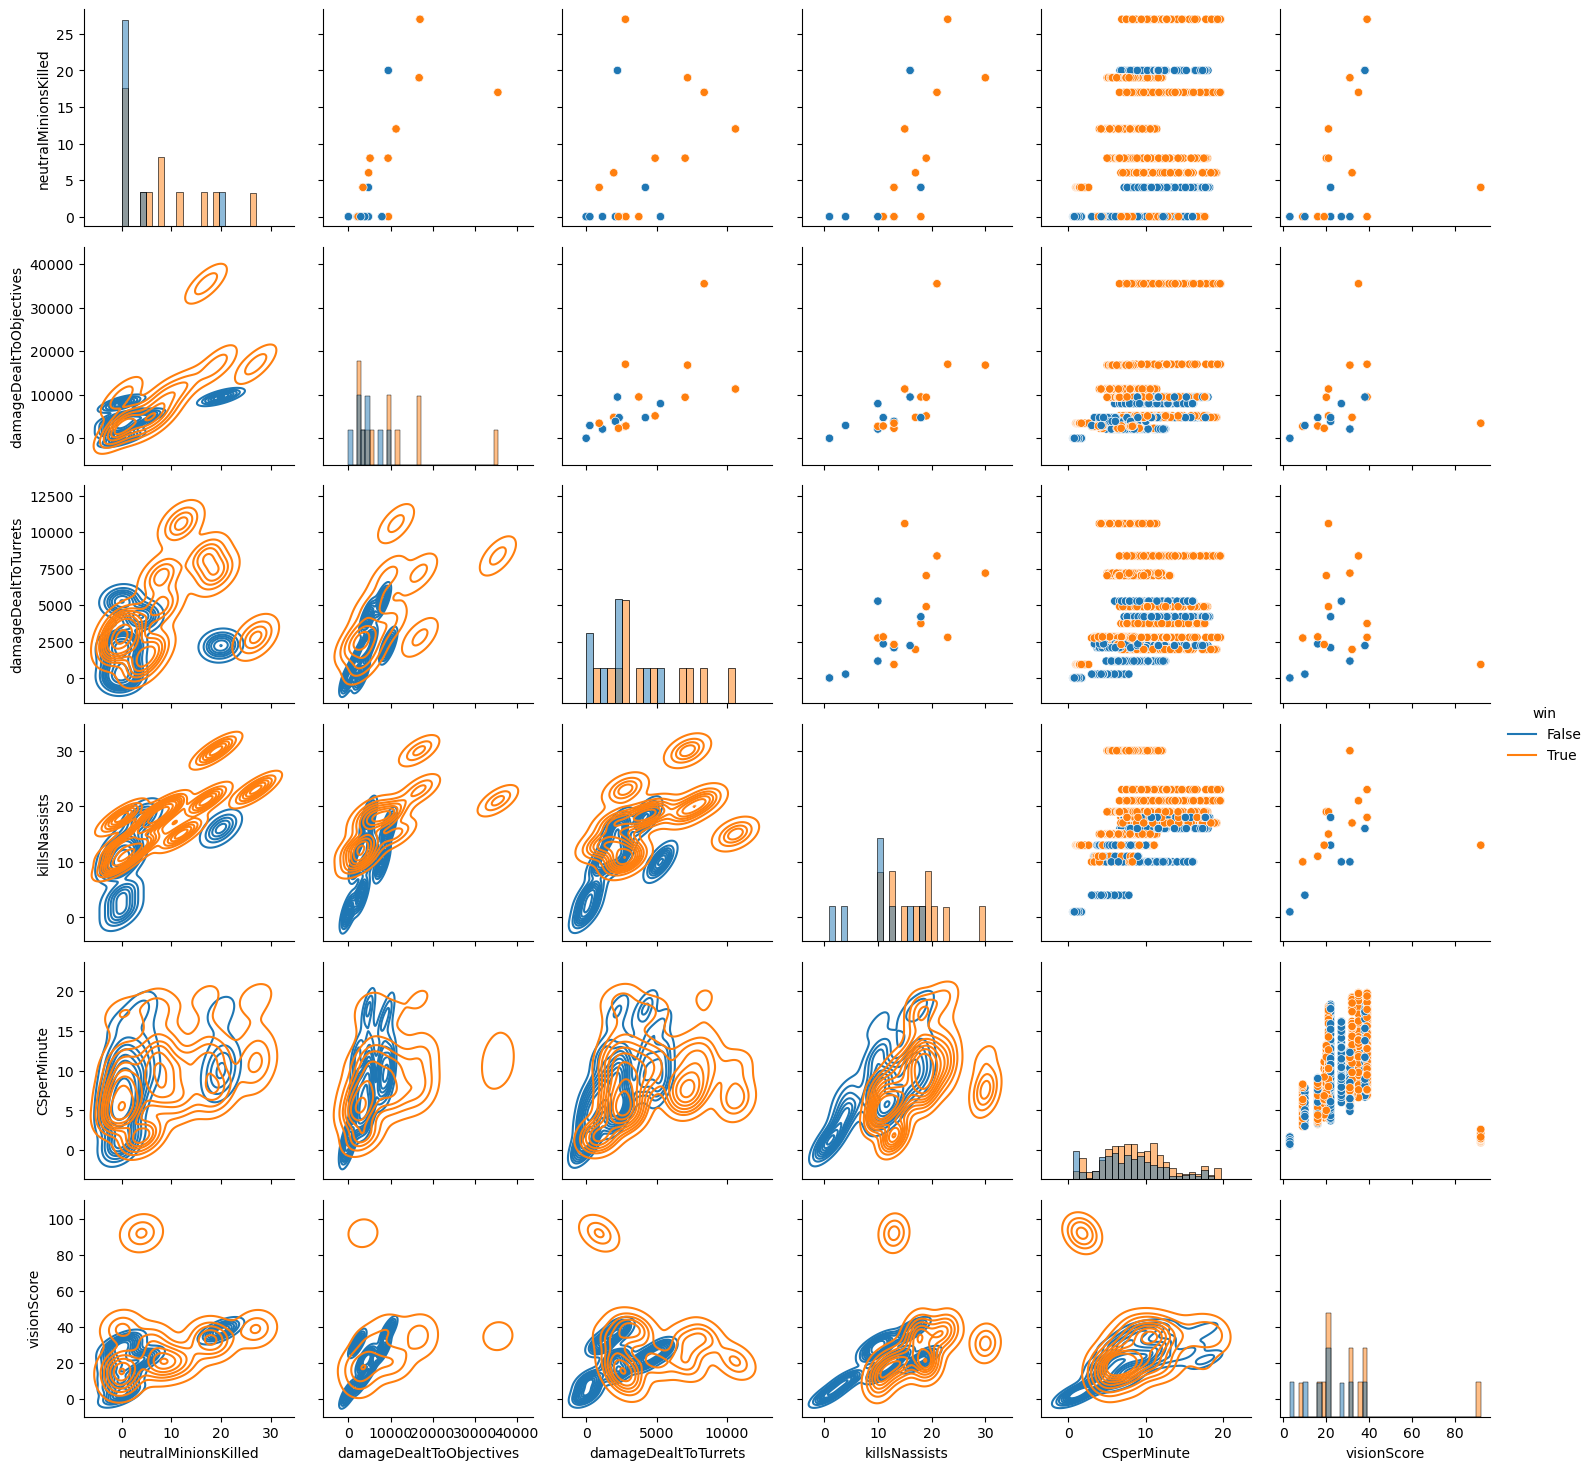

In [30]:
test = df_topMidLanerTotal.copy()
test.insert(4,'killsNassists',0)

KillnAssist = []
for key,value in test.iterrows():
    x = value['kills']
    y = value['assists']
    KillnAssist.append(x+y)
    
test['killsNassists'] = KillnAssist

    
test = test[['neutralMinionsKilled','damageDealtToObjectives','damageDealtToTurrets','killsNassists','CSperMinute','visionScore','win']]
g = sns.PairGrid(test, hue='win')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()

<p>These are picked because they are what people usually looked at to decide how good is a player</p><br>
<p>category clarification :</p>
<ul>
    <li>neutralMinionsKilled : how many forest monster player killed in the game.</li>
    <li>damageDealtToObjective : the total damage done by the player to game-pivoting objective monsters found in the forest area.</li>
    <li>damageDealtToTurrets : the total damage done by the player to opponents' base.</li>
    <li>killsNassists : the combined total of kills and assists the player has.</li>
    <li>CSperMinute : the total number of (all types of) minions killed by the player.</li>
    <li>visionScore : the score that indicate how much the player focus on lighting up areas of the map and denying opponents' vision of them</li>
</ul>

<p>Information gained :</p>
<ol>
    <li>visionScore does seem to influence whether a player is likely to win. However, its effect is not as impactful compared to other categories. Therefore, I consider it to not be the reason why people win. Albeit, there are a group of players that wins via overwhelming vision control of the map.</li><br>
    <li>Though the Mid Laner's main purpose is to push their own lane, they are more likely to win the game if they help their Jungler.</li>
    <ul>
        <li>This can be seen in the damageDealtToObjectives. Those who win their game have higher damage to objective monsters.</li>
        <li> The higher the number of objectives controlled, the better performance in other categories. This can be seen in the graph damageDealtToObjectives VS damageDealtToTurrets.</li><br>
        <li> For the graph damageDealtToObjectives VS CSperMinute, it shows that even if the Mid Laner is focused on expanding their lead via staying in his lane and killing lane minions, it is not as impactful as helping your Junglers in taking down objective monsters.</li>
    </ul>
    <br>
    <li> Neutral forest monsters are an opportunity for Junglers to farm that can be contested by both teams.</li>
    <ul>
        <li>Thus, the more neutral monsters you take from the enemy side, the more the opponent's Jungler falls behind and the more money you'll obtain.</li>
        <li> It can be seen how generally those who lost do not take advantage of this by killing the opponent's neutral minions.</li>
        <li>This can be seen in the graph neutralMonsterKilled vs DamagedealttoTurret</li>
        <ul>
            <li>By destroying more turrets, more areas of the map are safe for your team to traverse.</li>
            <li>By having more area to traverse, you'll have more access to the opponent's forest neutral monsters.</li>
            <li>Therefore, more opportunities to make the opponent fall behind even more.</li>
        </ul>
    </ul>
    <br>
    <li>If the Mid Laners are unable to push the enemy turret, they should still focus on helping other lanes.</li>
    <ul>
        <li>This can be seen in those who generally deal lesser damage to turrets, but still have a higher number in killsNassists than those who lose the game.</li>
        <li>Therefore, regardless of your lane condition, being on your feet is an important attribute a Mid Laner should have.</li>
    </ul>
</ol>
<!-- #info gain:
    #these are picked because they are what people usually looked at to decide how good is a player

    #vision score  seem not to be the major reason why people win
        
    #1. damage dealt to objective shows that even though the mid laner main purpose is to push the mid lane, 
    #yooure more likely to win the game if you help your jungler
        #since we can see that higher objective controlled, better performance in other categories
        #This can be seen with DamagedealtToObjectives VS damageDealtToTurrets
        #with damagedealttoObjective VS CSperMinute
            #it shows that even if youre focus on improving your growth via farming your lane minion,
            #its not as impactful to win the game compared to helping to take objective
        
    #2. neutral monster are an opportunity for junglers to farm that can be contested by both team. 
        #Thus, the more neutral monster you took from enemy side, the more the opponent;s jungler falls behind
        #it can be seen how generally those who lost dont take advantage of this by killing opponent's neutral minions loses more often
        #this can be obviously seen in the graph neutralMOnsterKilled vs DamagedealttoTurret
            #more turret down, more area of the map are safe for your team to traverse
            #more area to traverse, more access to opponent's jungle neutral monster
            #therefore, more monster to kill to make the opponent falls behind even more
        
            
    #3. if your unable to push the enemy turret, you should still focus helping other lanes.
        #this can be seen in those who generally deal lesser damage to turret, still have higher number in killsandassists than those who lose the game
    
    #this shows that, regardless of your lane condition, being on your feet is an imprtant attribute you must have -->
    

<h3>D. Should the Mid Laner play more passively?</h3>

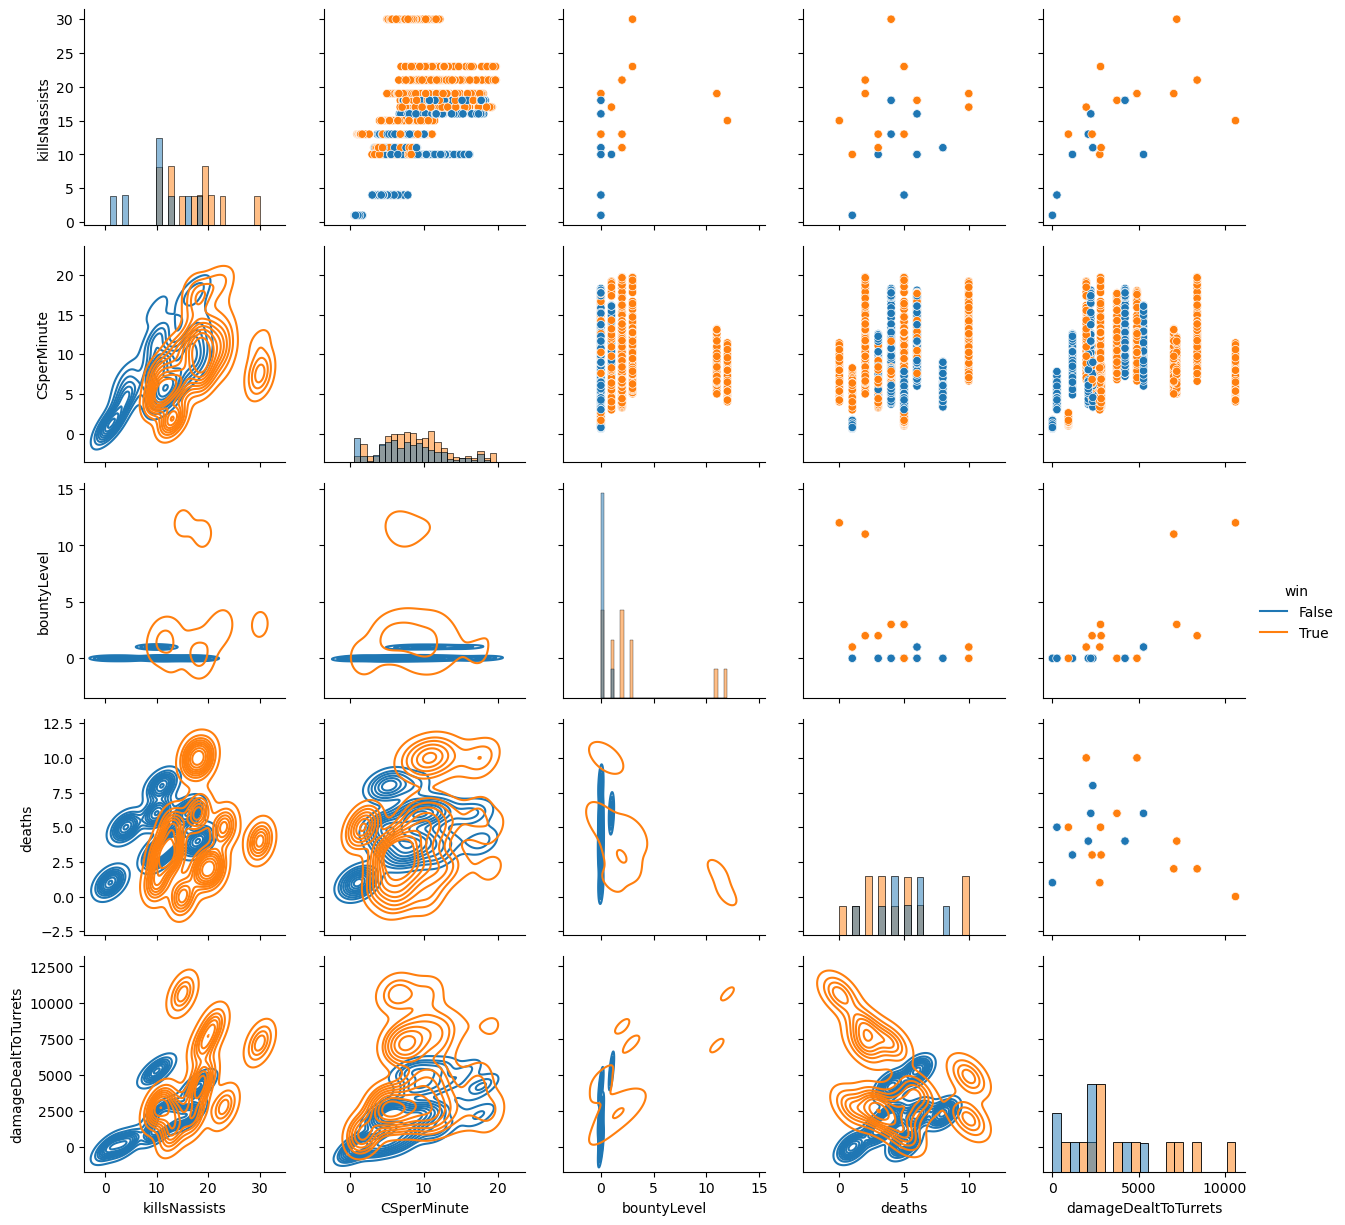

In [32]:
test = df_topMidLanerTotal.copy()

test.insert(4,'killsNassists',0)

KillnAssist = []
for key,value in test.iterrows():
    x = value['kills']
    y = value['assists']
    KillnAssist.append(x+y)
    
test['killsNassists'] = KillnAssist


    
test = test[['killsNassists','CSperMinute','bountyLevel','deaths','damageDealtToTurrets','win']]
g = sns.PairGrid(test, hue='win')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()

<p>These categories are picked in order to see how cautious is the Mid Laner</p>
<br>
<p>category clarification :</p>
<ul>
    <li>bountyLevel : The highest bonus amount of gold the opponent will receive if they killed the player.</li>
    <li>deaths : the total number of deaths by the player</li>
</ul>
<br>
<p>Information gained :</p>
<ol>
    <li>A Mid Laner should be on their feet is further supported.</li>
    <br>
    <li>The graph CSperMinute vs KillsNAssists shows that players prefer to get kills whenever possible.</li>
    <ul>
        <li>Rather than turtling in their lane to not lose gold from not killing lane monsters, this tells me that Mid Laners should be proactive in ensuring their team wins, more than just their own lane.</li>
        <li>This translates to the idea that Mid Laner should help their team whenever the opponent's Mid Laner doesn't have the opportunity to damage your team's turrets.</li>
        <li>This completely go against my idea of what a Mid Laner should do as I thought they should be focusing on pushing their lane. As the Middle path is the shortest path to the opponents' base.</li>
    </ul>
    <br>
    <li>In League of Legends, by partaking all multiple kills and assists, you'll be a target of a mechanic called bounty. The more kills or assists you have, the more gold the opponents will receive if they kill you.</li>
    <ul>
        <li>For the graph bountyLevel VS  CSperMin, it clearly shows that many Mid Laners will start to play safely after getting a bounty on their heads.</li>
        <li>This ensures the opponent can't catch up to your mistakes. Thus, making sure the they fall behind even further.</li>
    </ul>
</ol>

<h3>E. Summary of this section</h3>

<p>Playstyles that I should adopt if I was to play as a Mid Laner:</p>
<ol>
    <li>Even if you're playing on the path closest to the opponent's base, you focus on helping others cause of your position.</li>
    <li>Push your waves so your turret receive lesser damage when you go help your teammates (general knowledge).</li>
    <li>Partake in fights in other lanes when you roam to ensure your teammates win the fight, making the opponents fall behind.</li>
    <li>If your help in the other lane results in you having a high bounty, play safe so the enemy doesn't have the opportunity to cause a comeback and make sure to steal as much opponent's resources as possible.</li>
    <li>If you fail to keep your bounty or are unable to help the other lanes properly, go back to farming and passively help your Jungle, hoping the enemy makes mistakes.</li>
</ol>

<h1>8. Champions and Items I should use</h1>

<h3>A. The top 5 most played champions by Mid Laners in Korea</h3>

In [35]:
#process the list of top 500 players to get all mid laner's preferred champions
allChampionsPreferred= []
df_toFilterOnlyChampions = df_top500KRLoL.copy()

for key,value in df_toFilterOnlyChampions.iterrows():
    x = value['mostPosition']
    if x == 'MIDDLE':
        y = value['mostChampionIds']
        z = nltk.word_tokenize(y).copy()
        #this is so because eg [87,132,9] is is tokenised as ['[',',','8','7',','....]
        for i in z:
            if i == ',':
                z.remove(',')
        z.remove('[')
        z.remove(']')
        
        for i in z:
            #push all championId into a list to see which champion is played the most
            allChampionsPreferred.append(int(i))
                                         

In [36]:
df_preferredChampsType = pd.DataFrame(allChampionsPreferred, columns=['championIds'])
df_preferredChampsType.insert(1,'name',0)
df_preferredChampsType.insert(2,'type',0)

df_champsDetails = df_championsLoL.copy()
col = list(df_champsDetails)

championNames= []
championTypes= []
for key,value in df_preferredChampsType.iterrows():
    x = value['championIds']
    for i in col:
        y = int(df_championsLoL[i][0])
        if x == y:
            championNames.append(df_championsLoL[i][1])
            championTypes.append(df_championsLoL[i][2])
            break

#to generate a dataframe that contain all needed details of the champion
df_preferredChampsType['name'] = championNames
df_preferredChampsType['type'] = championTypes
df_preferredChampsType.head(2)

,championIds,name,type
0,84,Akali,['Assassin']
1,777,Yone,"['Assassin', 'Fighter']"


Champions played by top 500 Koreans players


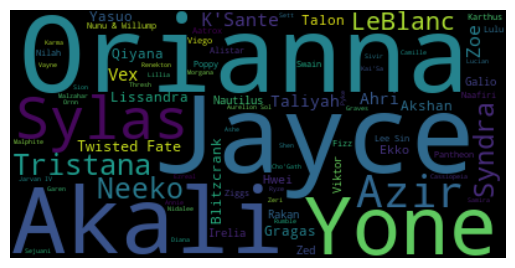

In [37]:
champAnalysis=nltk.FreqDist(df_preferredChampsType['name'])
print("Champions played by top 500 Koreans players")
wcloud=WordCloud().generate_from_frequencies(champAnalysis)
wcloud.background_color='black'
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-1.5, 200, 100, -2.5)
plt.show()

<p>This shows all of the champions played by top Mid Laners with their size corresponding to how much the champions are played</p>

In [38]:
top5Champ = champAnalysis.copy()

sortedtop5Champ = sorted(top5Champ.items(),key=lambda x:x[1], reverse=True)
processedtop5Champ = dict(sortedtop5Champ)

while len(processedtop5Champ) > 5:
    processedtop5Champ.popitem()

processedtop5Champ


{'Jayce': 59, 'Orianna': 57, 'Akali': 47, 'Yone': 47, 'Sylas': 34}

<h3>B. The core items for each of the champions</h3>

In [39]:
currentVersion = latestVersion
currentVersion = currentVersion.translate(str.maketrans('','',string.punctuation))
currentVersion  = currentVersion[0:-1]
currentVersion

'1324'

In [40]:
#This function will retrieve all data of a champion in high rank games
def get_championDetails(champion,patch):
        urlStart = 'https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/'
        urlMiddle = '?patch='
        urlEnd = '&tierId=1'
        url=urlStart+champion+urlMiddle+patch+urlEnd
        print(url)
        res = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        return res.json()

def get_n_championDetails(championDict,patch):
    reviews = []

    for x in championDict:
        response = get_championDetails(x.lower(),patch)
        reviews += response['championTier']['stats']
    
    return reviews


In [41]:
top5championsDetails = get_n_championDetails(processedtop5Champ,currentVersion)

https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/jayce?patch=1324&tierId=1
https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/orianna?patch=1324&tierId=1
https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/akali?patch=1324&tierId=1
https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/yone?patch=1324&tierId=1
https://lol.dakgg.io/api/v1/champion-stats/tiers/kr/420440/sylas?patch=1324&tierId=1


In [42]:
df_top5Champs = pd.DataFrame(top5championsDetails)
df_top5Champs = df_top5Champs.loc[df_top5Champs["position"] == 'MIDDLE']
df_top5Champs = df_top5Champs.reset_index(drop=True)
df_top5Champs.head(2)

,championId,position,positionId,games,plays,wins,kills,deaths,assists,goldEarned,...,prevStats,banStat,times,spells,perks,skills,startItems,bootsItems,coreItems,mythicItems
0,126,MIDDLE,3,12270,12270,6108,68030,66905,69151,139691947,...,"[{'patch': 1323, 'patchGames': 166471, 'plays'...","{'key': 126, 'games': 18001, 'bans': 18434, 'c...","[{'key': '0-15', 'plays': 148, 'wins': 80}, {'...","[{'keys': [4, 12], 'plays': 12027, 'wins': 600...","[{'keys': [8230, 8300], 'plays': 6881, 'wins':...","[{'keys': [1, 2, 3], 'plays': 9969, 'wins': 52...","[{'keys': [1055, 2003], 'plays': 10792, 'wins'...","[{'key': 3158, 'plays': 7596, 'wins': 4004}, {...","[{'keys': [6692, 3004, 6694], 'plays': 1931, '...","[{'key': 6692, 'plays': 3925, 'wins': 2022, 'b..."
1,61,MIDDLE,3,31281,31281,15507,139611,135876,232482,324987782,...,"[{'patch': 1323, 'patchGames': 166471, 'plays'...","{'key': 61, 'games': 73539, 'bans': 83355, 'ch...","[{'key': '0-15', 'plays': 446, 'wins': 245}, {...","[{'keys': [4, 12], 'plays': 30950, 'wins': 153...","[{'keys': [8230, 8300], 'plays': 14330, 'wins'...","[{'keys': [1, 2, 3], 'plays': 18700, 'wins': 9...","[{'keys': [1056, 2003, 2003], 'plays': 30803, ...","[{'key': 3020, 'plays': 20567, 'wins': 10234},...","[{'keys': [6655, 4645, 3157], 'plays': 1435, '...","[{'key': 6655, 'plays': 13781, 'wins': 7464, '..."


In [43]:
#we only need the sections that show all item paths used by high rank players
df_champBuild = pd.json_normalize(df_top5Champs['coreItems'])
df_champBuild.head(2)

,0,1,2,3,4
0,"{'keys': [6692, 3004, 6694], 'plays': 1931, 'w...","{'keys': [3142, 3004, 6694], 'plays': 1810, 'w...","{'keys': [6691, 3004, 6694], 'plays': 1175, 'w...","{'keys': [6692, 3004, 3156], 'plays': 124, 'wi...","{'keys': [3142, 3004, 3161], 'plays': 95, 'win..."
1,"{'keys': [6655, 4645, 3157], 'plays': 1435, 'w...","{'keys': [6655, 4645, 3089], 'plays': 1086, 'w...","{'keys': [6655, 4645, 3135], 'plays': 833, 'wi...","{'keys': [6655, 3003, 4645], 'plays': 454, 'wi...","{'keys': [6655, 4645, 3102], 'plays': 123, 'wi..."


In [44]:
df_champBuildBest = df_champBuild.copy()
col = list(df_champBuildBest)

bestBuild = []
for i in range(len(df_champBuildBest)):
    max = (df_champBuildBest[0][i]['wins']/df_champBuildBest[0][i]['plays']*100)
    build = df_champBuildBest[0][i]
    for x in col:
        winrate = df_champBuildBest[x][i]['wins']/df_champBuildBest[x][i]['plays']*100
        if winrate > max:
            max = winrate
            build = df_champBuildBest[x][i]
            
    bestBuild.append(build)

#there are a total of 5 recommended item paths per champions.
#I will take in the item path with the highest win rate.
df_champBuildBest.insert(5,'best Build',0)
df_champBuildBest['best Build'] = bestBuild
df_champBuildBest = df_champBuildBest['best Build']
df_champBuildBest

0    {'keys': [3142, 3004, 3161], 'plays': 95, 'win...
1    {'keys': [6655, 4645, 3157], 'plays': 1435, 'w...
2    {'keys': [3152, 4645, 3041], 'plays': 422, 'wi...
3    {'keys': [6672, 3181, 6671], 'plays': 358, 'wi...
4    {'keys': [6656, 3157, 3089], 'plays': 290, 'wi...
Name: best Build, dtype: object

In [60]:
df_toAddWinRate = pd.json_normalize(df_champBuildBest)
df_toAddWinRate.insert(1,'win rate(%)',0)

winRate= []
for key,value in df_toAddWinRate.iterrows():
    x = value['plays']
    y = value['wins']
    winRate.append(y/x*100)
    
df_toAddWinRate['win rate(%)'] = winRate
df_toAddWinRate = df_toAddWinRate.drop(labels=["wins","plays"],axis =1)
df_champBestBuildFinal = df_toAddWinRate
df_champBestBuildFinal.head(2)
#calculate and add winrate% when the champion is using this item paths

,keys,win rate(%)
0,"[3142, 3004, 3161]",63.157895
1,"[6655, 4645, 3157]",58.466899


<p>This is done to identify the items path with the highest win rate (%)</p>

<h3>C .Combining the datasets of champions and items sets</h3>

In [47]:
df_top5ChampsToAdd = df_top5Champs[['championId','position']]
df_top5ChampsProcessed = pd.concat([df_top5ChampsToAdd,df_champBestBuildFinal],axis=1)

df_top5ChampsProcessed.insert(0,'name',0)
df_top5ChampsProcessed.insert(3,'type',0)

df_champsDetails = df_championsLoL.copy()
col = list(df_champsDetails)

championNames= []
championTypes= []
for key,value in df_top5ChampsProcessed.iterrows():
    x = value['championId']
    for i in col:
        y = int(df_championsLoL[i][0])
        if x == y:
            championNames.append(df_championsLoL[i][1])
            championTypes.append(df_championsLoL[i][2])
            break

df_top5ChampsProcessed['name'] = championNames
df_top5ChampsProcessed['type'] = championTypes
df_top5ChampsProcessed

,name,championId,position,type,keys,win rate(%)
0,Jayce,126,MIDDLE,"['Fighter', 'Marksman']","[3142, 3004, 3161]",63.157895
1,Orianna,61,MIDDLE,"['Mage', 'Support']","[6655, 4645, 3157]",58.466899
2,Akali,84,MIDDLE,['Assassin'],"[3152, 4645, 3041]",81.042654
3,Yone,777,MIDDLE,"['Assassin', 'Fighter']","[6672, 3181, 6671]",67.039106
4,Sylas,517,MIDDLE,"['Mage', 'Assassin']","[6656, 3157, 3089]",66.551724


In [64]:
cwd = os.getcwd()
filename = "Top5MidChampWBuildLoL.csv"
pathCNB = os.path.join(cwd,filename)
df_top5ChampsProcessed.to_csv(pathCNB,index = False)

In [56]:
#download necessary pictures
def get_championORitemDetails(item,patch,category):
        urlStart='https://ddragon.leagueoflegends.com/cdn/'
        urlMiddle1 = '/img/'
        urlMiddle2 = '/'
        urlEnd = '.png'
        url = urlStart + patch + urlMiddle1 +category + urlMiddle2+ item + urlEnd
        res = requests.get(url)
        
        with open("./assets/"+str(item)+".png","wb") as f:
            f.write(res.content)

In [57]:
for key,value in df_top5ChampsProcessed.iterrows():
    name = value['name']
    get_championORitemDetails(name,latestVersion,"champion")
    for i in value['keys']:
        get_championORitemDetails(str(i),latestVersion,"item")

<h3>D. Summary of this section</h4>

<h2>1. Best champions to play as Mid Laner to rank up as of 13.24.1 are:</h2><br><br>
<div style:"display:flex; flex-direction:row;">
<p style="font-size: 20px;">No.1 : <strong>Jayce</strong> <img src="./assets/Jayce.png" width="100" height="100"></p>
<p style="font-size: 20px;">Champion Type : Fighter/Marksman</p>
<p style="font-size: 20px;">Recommended Items :</p>
<ul style="display:flex; flex-direction:row; justify-content: space-around; gap: 4em;">
        <li style="font-size: 20px; padding-right: 80px;"><img src="./assets/3142.png" width="50" height="50">Youmuu's Ghostblade</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3004.png" width="50" height="50">Manamune</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3161.png" width="50" height="50">Spear of Shojin</li>
</ul>
</div>
<br><br><br>
<div style:"display:flex; flex-direction:row;">
<p style="font-size: 20px;">No.2 : <strong>Orianna</strong> <img src="./assets/Orianna.png" width="100" height="100"></p>
<p style="font-size: 20px;">Champion Type : Mage/Support</p>
<p style="font-size: 20px;">Recommended Items :</p>
<ul style="display:flex; flex-direction:row; justify-content: space-around; gap: 4em;">
        <li style="font-size: 20px; padding-right: 80px;"><img src="./assets/6655.png" width="50" height="50">Luden's Tempest</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/4645.png" width="50" height="50">Shadowflame</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3157.png" width="50" height="50">Spear of Shojin</li>
</ul>
</div>
<br><br><br>
<div style:"display:flex; flex-direction:row;">
<p style="font-size: 20px;">No.3 : <strong>Yone</strong> <img src="./assets/Yone.png" width="100" height="100"></p>
<p style="font-size: 20px;">Champion Type : Assasin/Fighter</p>
<p style="font-size: 20px;">Recommended Items :</p>
<ul style="display:flex; flex-direction:row; justify-content: space-around; gap: 4em;">
        <li style="font-size: 20px; padding-right: 80px;"><img src="./assets/6672.png" width="50" height="50">Kraken Slayer</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3181.png" width="50" height="50">Hullbreaker</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/6671.png" width="50" height="50">Galeforce</li>
</ul>
</div>
<br><br><br>
<div style:"display:flex; flex-direction:row;">
<p style="font-size: 20px;">No.4 : <strong>Akali</strong> <img src="./assets/Akali.png" width="100" height="100"></p>
<p style="font-size: 20px;">Champion Type : Assassin</p>
<p style="font-size: 20px;">Recommended Items :</p>
<ul style="display:flex; flex-direction:row; justify-content: space-around; gap: 4em;">
        <li style="font-size: 20px; padding-right: 80px;"><img src="./assets/3152.png" width="50" height="50">Hextech Rocketbelt</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/4645.png" width="50" height="50">Shadowflame</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3041.png" width="50" height="50">Mejai's Soulstealer</li>
</ul>
</div>
<br><br><br>
<div style:"display:flex; flex-direction:row;">
<p style="font-size: 20px;">No.5 : <strong>Sylas</strong> <img src="./assets/Sylas.png" width="100" height="100"></p>
<p style="font-size: 20px;">Champion Type : Mage/Assassin</p>
<p style="font-size: 20px;">Recommended Items :</p>
<ul style="display:flex; flex-direction:row; justify-content: space-around; gap: 4em;">
        <li style="font-size: 20px; padding-right: 80px;"><img src="./assets/6656.png" width="50" height="50">Everfrost</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3157.png" width="50" height="50">Zhonya's Hourglass</li>
        <li style="font-size: 20px;padding-right: 80px;"><img src="./assets/3089.png" width="50" height="50">Rabadon's Deathcap</li>
</ul>
</div>
<br><br><br>


<h1>9. Conclusion</h1>

<p>In conclusion, this project has provided me with valuable insights, revealing that the 'Bot Laner' role may not be the most effective path for ranking up in League of Legends. Through a deep and comprehensive analysis of top players in Korea, I have gained a profound understanding of the optimal role selection, necessary playstyle for optimal performance, and the specific champions that align with my personal goal. This research highlights the importance of paying attention to everything around the map to aid your teammates, be a proactive players to take advantages of the opponents' resources when I'm ahead in game, a proper strategic decision-making when aiming for success in the highly competitive landscape of League of Legends.</p>